In [1]:
!pip install qiskit --quiet
!pip install qiskit-aer --quiet

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.0/8.0 MB 49.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.2/2.2 MB 74.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.5/49.5 kB 4.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.4/12.4 MB 49.6 MB/s eta 0:00:00


In [12]:
from qiskit import QuantumCircuit, transpile
from qiskit.quantum_info import Statevector,partial_trace
from qiskit.visualization import plot_bloch_multivector, plot_state_city, plot_histogram
from qiskit_aer import AerSimulator
import numpy as np
import matplotlib.pyplot as plt

Statevector (amplitudes):
[0.35355339+0.j 0.35355339+0.j 0.35355339+0.j 0.35355339+0.j
 0.35355339+0.j 0.35355339+0.j 0.35355339+0.j 0.35355339+0.j]


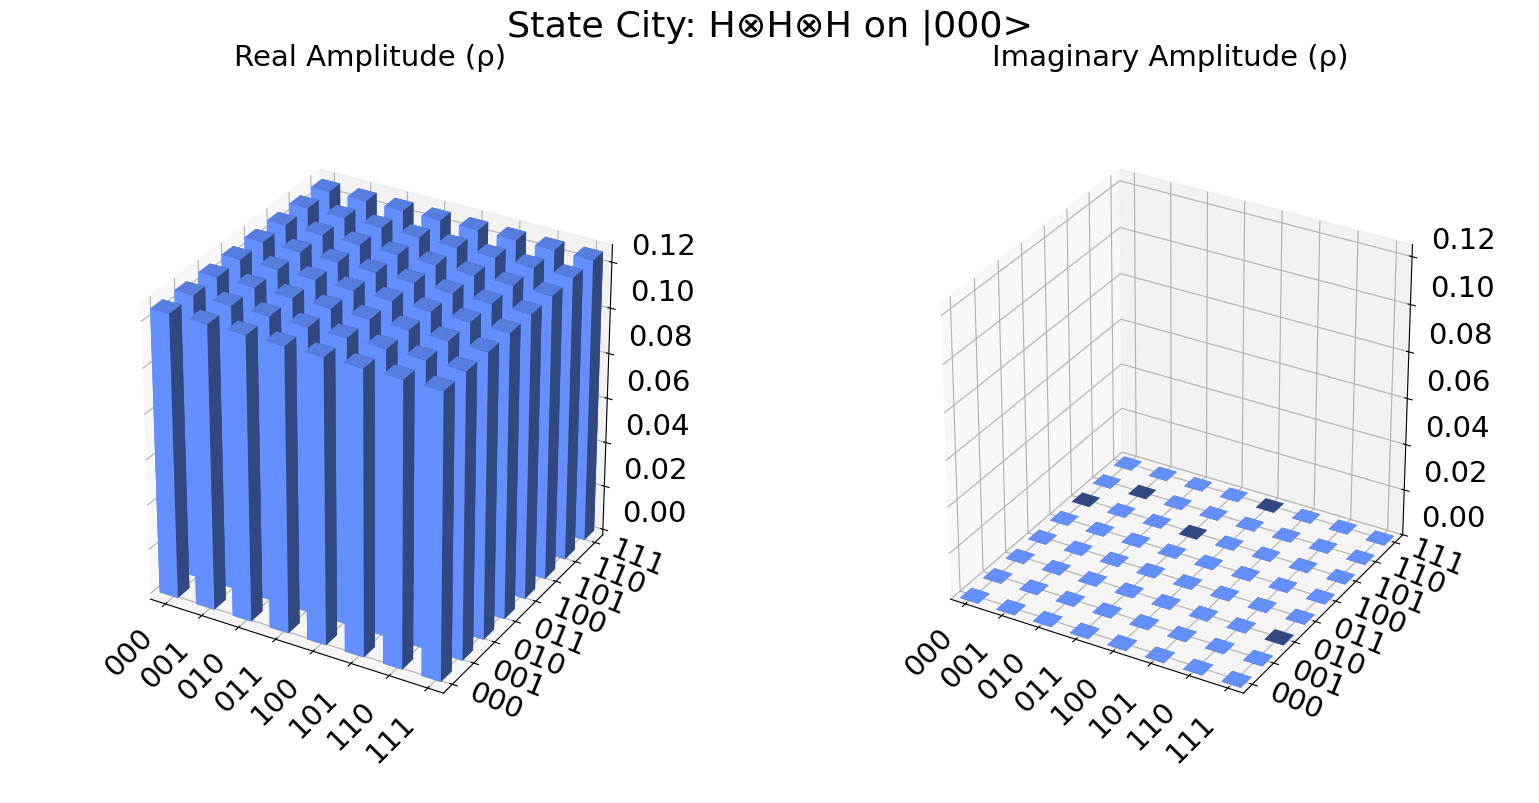

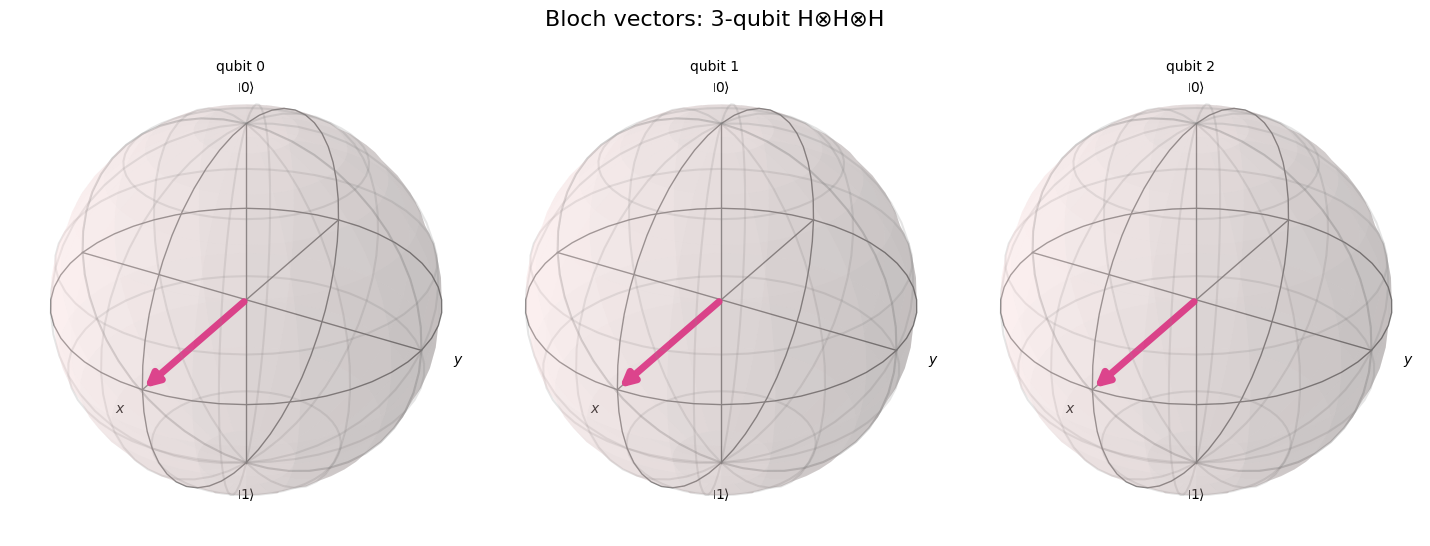

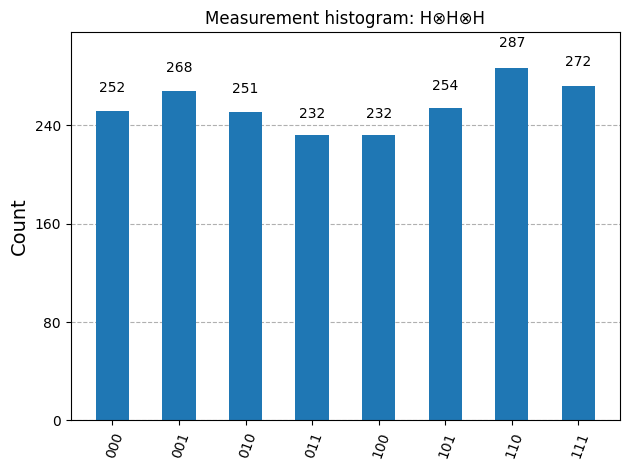

Counts (sample): {'100': 232, '101': 254, '110': 287, '001': 268, '111': 272, '011': 232, '010': 251, '000': 252}


In [3]:
# 3 qubit H⊗H⊗H  Qiskit code

# Build circuit and state
qc3 = QuantumCircuit(3, 3)
qc3.h([0,1,2])
qc3.measure([0,1,2], [0,1,2])
qc3_state = QuantumCircuit(3)
qc3_state.h([0,1,2])
state3 = Statevector.from_instruction(qc3_state)

print("Statevector (amplitudes):")
print(state3.data)   # should be 1/sqrt(8) for all 8 basis states

# Visualize
display(plot_state_city(state3, title="State City: H⊗H⊗H on |000>"))
display(plot_bloch_multivector(state3, title="Bloch vectors: 3-qubit H⊗H⊗H"))

# Simulate measurements
sim = AerSimulator()
qc3_t = transpile(qc3, sim)
result3 = sim.run(qc3_t, shots=2048).result()
counts3 = result3.get_counts()
display(plot_histogram(counts3, title="Measurement histogram: H⊗H⊗H"))
print("Counts (sample):", counts3)


GHZ statevector (amplitudes):
[0.70710678+0.j 0.        +0.j 0.        +0.j 0.        +0.j
 0.        +0.j 0.        +0.j 0.        +0.j 0.70710678+0.j]


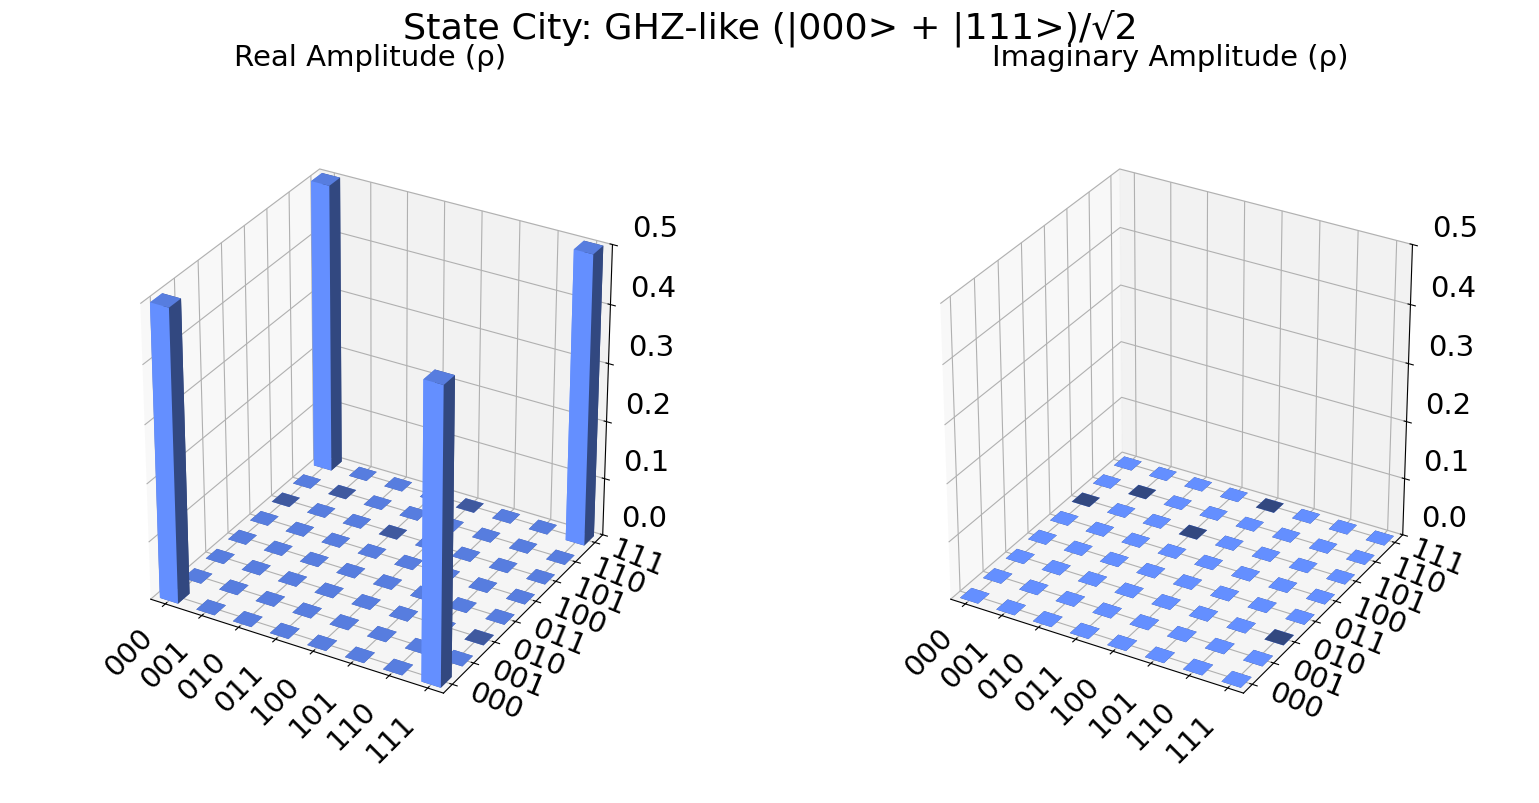

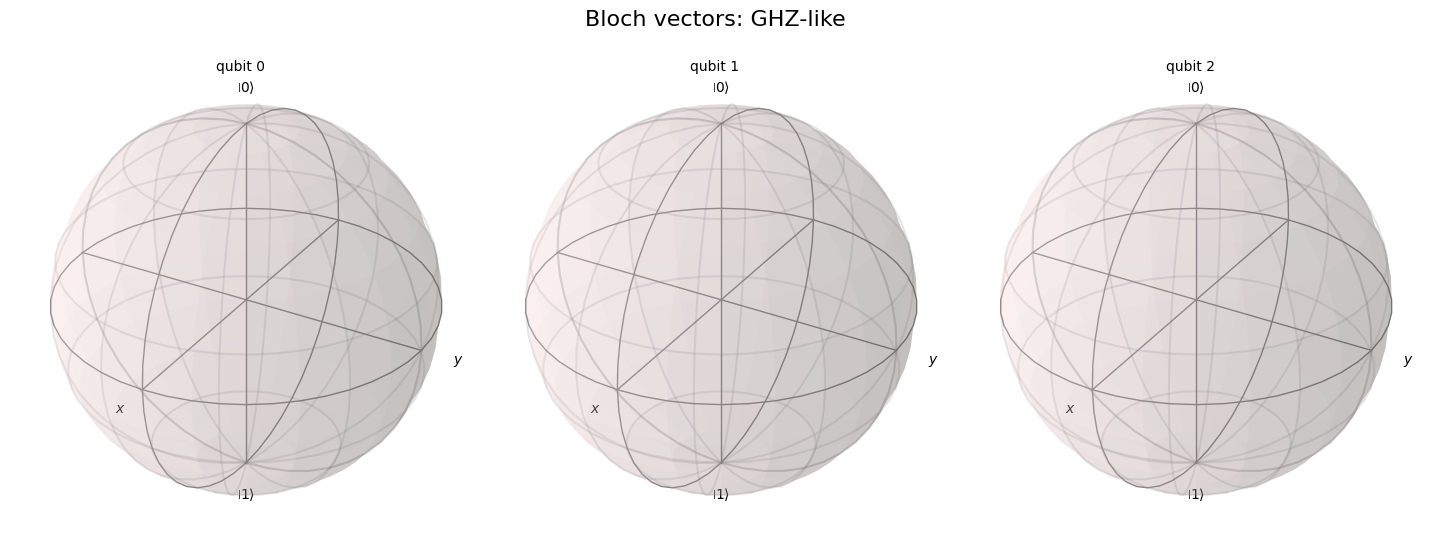

Reduced density (qubit 0):
 DensityMatrix([[0.5+0.j, 0. +0.j],
               [0. +0.j, 0.5+0.j]],
              dims=(2,))


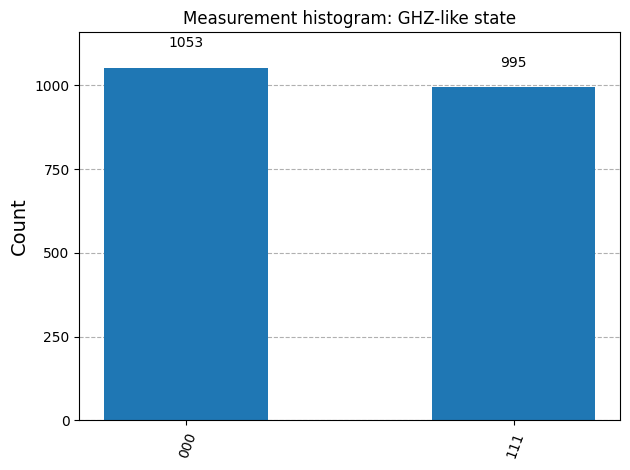

Counts: {'000': 1053, '111': 995}


In [6]:
# Build GHZ (3-qubit entangled) via H, CX, CX
qc_ghz = QuantumCircuit(3, 3)
qc_ghz.h(0)
qc_ghz.cx(0, 1)
qc_ghz.cx(0, 2)
qc_ghz.measure([0,1,2], [0,1,2])

# Statevector before measurement
qc_ghz_state = QuantumCircuit(3)
qc_ghz_state.h(0)
qc_ghz_state.cx(0,1)
qc_ghz_state.cx(0,2)
state_ghz = Statevector.from_instruction(qc_ghz_state)

print("GHZ statevector (amplitudes):")
print(state_ghz.data)

# Visualize
display(plot_state_city(state_ghz, title="State City: GHZ-like (|000> + |111>)/√2"))
display(plot_bloch_multivector(state_ghz, title="Bloch vectors: GHZ-like"))

# Reduced density of qubit-0 (should be maximally mixed)
reduced_q0 = partial_trace(state_ghz, [1,2])
print("Reduced density (qubit 0):\n", reduced_q0)

# Simulation
sim = AerSimulator()
qc_ghz_t = transpile(qc_ghz, sim)
result_ghz = sim.run(qc_ghz_t, shots=2048).result()
counts_ghz = result_ghz.get_counts()
display(plot_histogram(counts_ghz, title="Measurement histogram: GHZ-like state"))
print("Counts:", counts_ghz)


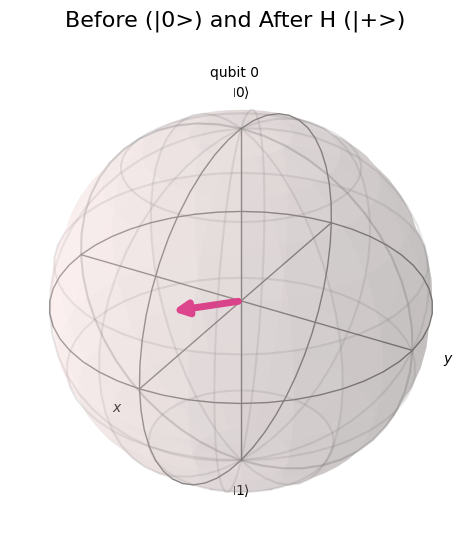

In [8]:
from qiskit import QuantumCircuit
from qiskit.quantum_info import Statevector
from qiskit.visualization import plot_bloch_multivector

# |0> -> after H -> |+>
sv_0 = Statevector([1,0])
qc_h = QuantumCircuit(1)
qc_h.h(0)

# ✅ Use .evolve(qc_h) directly (no inline circuit creation)
sv_0_after = sv_0.evolve(qc_h)

display(plot_bloch_multivector([sv_0, sv_0_after], title="Before (|0>) and After H (|+>)"))


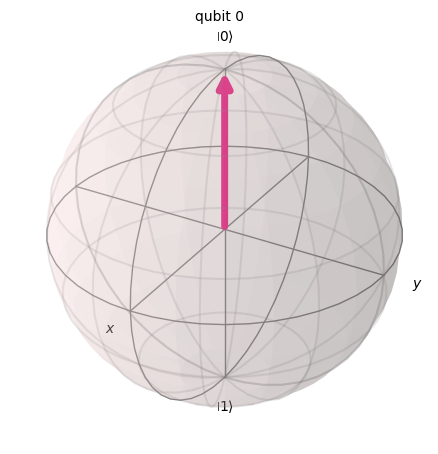

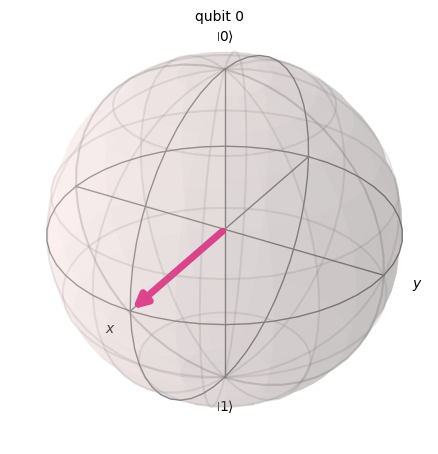

In [13]:
qc = QuantumCircuit(1)

# Initial state |0⟩
initial_state = Statevector.from_label('0')
display(plot_bloch_multivector(initial_state))
qc.h(0)

# Get the new statevector
state_after_h = Statevector.from_instruction(qc)
display(plot_bloch_multivector(state_after_h))
plt.show()
